In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [93]:
n_cluster_samples = 500
random_state = 17
n_noises = 100

x = np.random.multivariate_normal( [0, 0], [[8, 0], [0, 16]], n_cluster_samples)
y = np.random.multivariate_normal( [6, 6], [[0.001, 0], [0, 0.001]], n_noises)
total = np.append(x, y, axis=0)

# random sample
sum_list = np.linspace(0, total.shape[0] - 1, total.shape[0])
np.random.shuffle(sum_list)
samples = total[list(sum_list[0:int(total.shape[0] * 0.1)]), :]

# total.shape
np.savetxt(X=total[:, 0], fname="/home/haiqw/data/toy_dataset/toy_dataset_1.txt", fmt="%.4f", delimiter=" ")
np.savetxt(X=samples[:, 1], fname="/home/haiqw/data/toy_dataset/toy_dataset_2.txt", fmt="%.4f", delimiter=" ")

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


In [128]:
tmp = np.loadtxt("/home/haiqw/data/toy_dataset/result.txt")
density = np.empty(shape=(tmp.size, 2))
density[:, 0] = total[:, 0]
density[:, 1] = tmp
density

array([[ -4.59588600e+00,   4.69450000e-03],
       [ -1.44245524e+00,   4.69450000e-03],
       [ -8.86315692e+00,   4.69450000e-03],
       ..., 
       [  5.99281711e+00,   7.08195000e-03],
       [  6.00097440e+00,   7.08195000e-03],
       [  5.97392586e+00,   7.08195000e-03]])

data distribution


/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


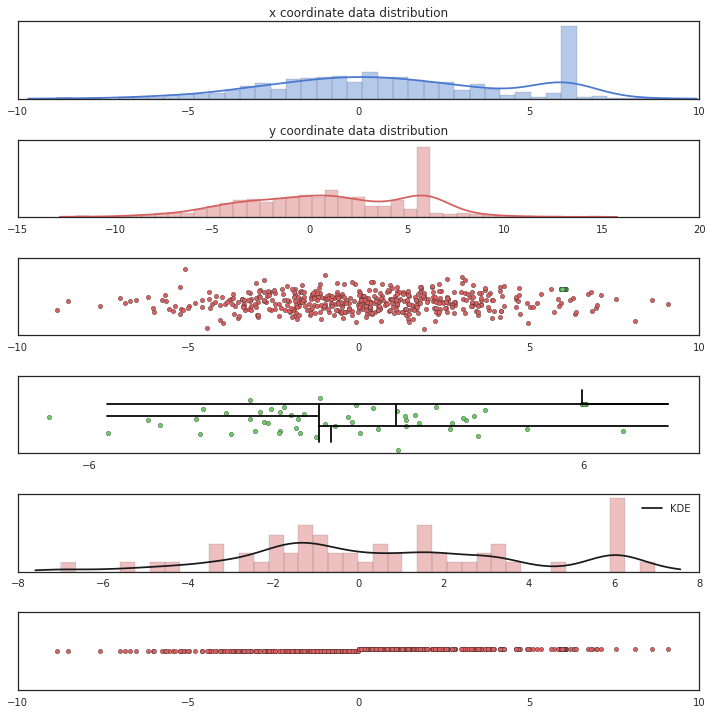

In [129]:
#plt.subplot(221)
print ("data distribution")

f, axes = plt.subplots(6, 1, figsize=(10, 10))
sns.set(style="white", palette="muted", color_codes=True)

# sns.distplot(x[:, 0], kde=False, color="b")
sns.distplot(total[:, 0], bins=40, kde=True, color="b", ax=axes[0])
sns.distplot(total[:, 1], bins=40, kde=True, color="r", ax=axes[1])
sns.distplot(samples[:, 0], bins=40, kde=True,
             kde_kws={"color": "k", "bw": 0.2, "label": "KDE"},
             color="r", ax=axes[4])
axes[5].scatter(density[:, 0], density[:, 1], c='r')
axes[2].scatter(x[:, 0], x[:, 1], c='r')
axes[2].scatter(y[:, 0], y[:, 1], c='g')
axes[3].scatter(samples[:, 0], samples[:, 1], c='g')
axes[3].set_xticks([-6, 6])


axes[3].plot([-5.575, 8.058], [5.964, 5.964], c='black')
axes[3].plot([-0.4302, -0.4302], [-6.3509, 5.964], c='black')
axes[3].plot([-5.575, -0.4302], [1.9334, 1.9334], c='black')
axes[3].plot([-0.4302, 8.058], [-1.2516, -1.2516], c='black')
axes[3].plot([-0.1374, -0.1374], [-6.3509, -1.2516], c='black')
axes[3].plot([1.4398, 1.4398], [-1.2516, 5.964], c='black')
axes[3].plot([5.9538, 5.9538], [5.964, 10.5036], c='black')
axes[3].plot([5.9538, 8.058], [5.9973, 5.9973], c='black')




axes[0].set_title("x coordinate data distribution")
axes[1].set_title("y coordinate data distribution")

plt.setp(axes, yticks=[])
plt.tight_layout()

data distribution


/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


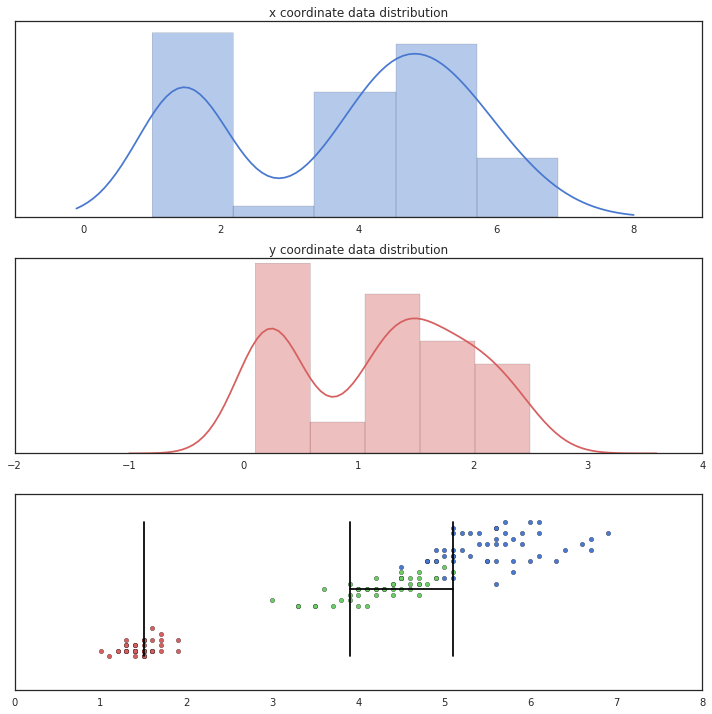

In [70]:
iris = datasets.load_iris().data
iris_target = datasets.load_iris().target
iris = iris[:, 2:4]
np.savetxt(X=iris, fname='/home/haiqw/data/toy_dataset/iris_1.txt', fmt='%.4f', delimiter=' ')
#plt.subplot(221)
print ("data distribution")

f, axes = plt.subplots(3, 1, figsize=(10, 10))
sns.set(style="white", palette="muted", color_codes=True)

# sns.distplot(x[:, 0], kde=False, color="b")
sns.distplot(iris[:, 0], kde=True, color="b", ax=axes[0])
sns.distplot(iris[:, 1], kde=True, color="r", ax=axes[1])

axes[2].scatter(iris[np.where(iris_target==0)[0], 0], iris[np.where(iris_target==0)[0], 1], c='r')
axes[2].scatter(iris[np.where(iris_target==1)[0], 0], iris[np.where(iris_target==1)[0], 1], c='g')
axes[2].scatter(iris[np.where(iris_target==2)[0], 0], iris[np.where(iris_target==2)[0], 1], c='b')

axes[2].plot([3.9, 3.9], [0.1, 2.5], c='black')
axes[2].plot([1.5, 1.5], [0.1, 2.5], c='black')
axes[2].plot([5.1, 5.1], [0.1, 2.5], c='black')
axes[2].plot([3.9, 5.1], [1.3, 1.3], c='black')

axes[0].set_title("x coordinate data distribution")
axes[1].set_title("y coordinate data distribution")

plt.setp(axes, yticks=[])
plt.tight_layout()

data distribution


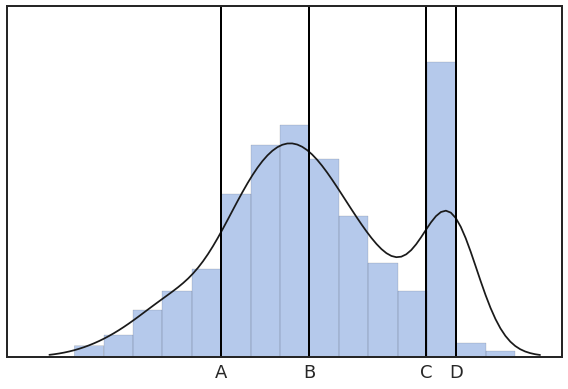

In [90]:
print ("data distribution")
plt.rcParams["axes.linewidth"] = 2
f = plt.figure()
#sns.set(style="white", palette="muted", color_codes=True)

sns.distplot(total[:, 0], bins=15, kde=True, 
             kde_kws={"color": "k", "bw": 0.3},
             color="b")
plt.plot([-2.3, -2.3], [0, 0.20], linewidth=2, c='black')
plt.plot([0.9, 0.9], [0, 0.20], linewidth=2, c='black')
plt.plot([5.1, 5.1], [0, 0.20], linewidth=2, c='black')
plt.plot([6.2, 6.2], [0, 0.20], linewidth=2, c='black')
plt.xticks([-2.3, 0.9, 5.1, 6.2], ["A", "B", "C", "D"],  fontsize=18)
plt.yticks([])
plt.ylim([0, 0.20])
plt.tight_layout()
plt.savefig("/home/haiqw/codes/tools/dataset/dip.eps", format="eps", dpi=1200, bbox_inches="tight")

In [83]:
x = [0,5,9,10,15]
y = [0,1,2,3,4]
np.arange(min(x), max(x)+1, 1.0)


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.])